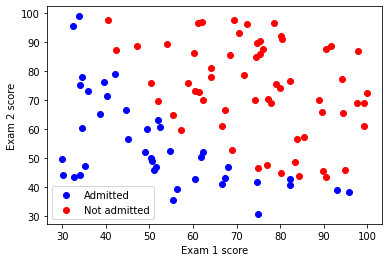

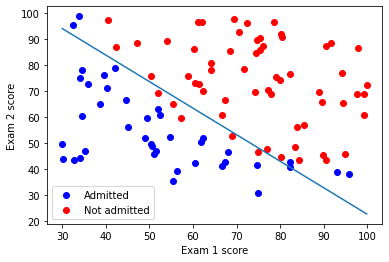

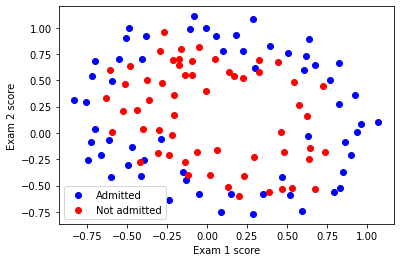

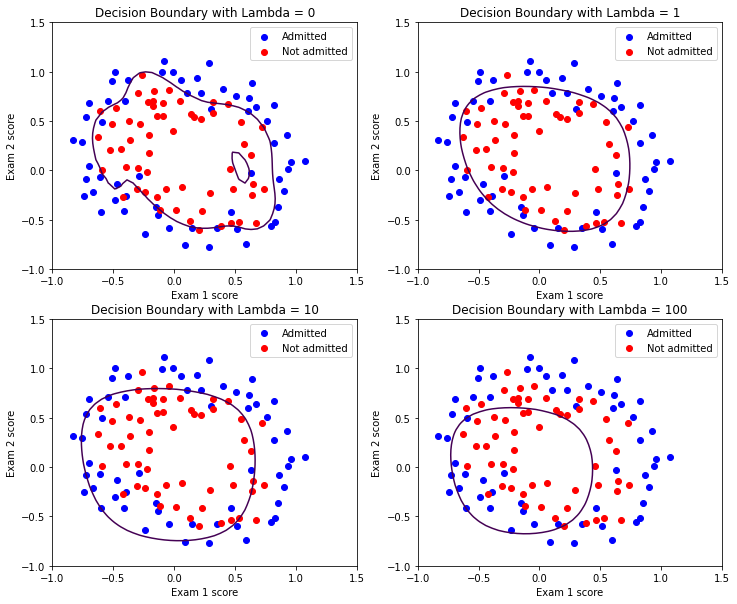

In [20]:
from logistic_regression import *
import scipy.optimize as op
import os


def loadData(path):
    path = os.getcwd() + path
    data = np.loadtxt(path, dtype=float, delimiter=',')
    X = data[:, 0:2]
    y = data[:, 2]
    return X, y


def plotScatter(path):
    X, y = loadData(path)
    y = y.astype(int)
    neg = (y == 0)
    pos = (y == 1)
    lable1 = plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='b')
    lable2 = plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='r')
    plt.legend((lable1, lable2), ('Admitted', 'Not admitted'))
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')


def decisionBoundary(theta, path):
    plotScatter(path)
    X, y = loadData(path)
    y.astype(int)
    boundary_xs = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    boundary_ys = (-1. / theta[2]) * (theta[0] + theta[1] * boundary_xs)
    plt.plot(boundary_xs, boundary_ys)


def decisionBoundaryReg(theta, X, y, lamb=0.):
    theta, mincost = optimizeRegularizedTheta(theta, X, y, lamb)
    xvals = np.linspace(-1, 1.5, 50)
    yvals = np.linspace(-1, 1.5, 50)
    zvals = np.zeros((len(xvals), len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]), np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta, myfeaturesij.T)
    zvals = zvals.transpose()

    u, _ = np.meshgrid(xvals, yvals)
    plt.contour(xvals, yvals, zvals, [0])
    plt.title("Decision Boundary with Lambda = %d" % lamb)


def optimizeRegularizedTheta(theta, X, y, lamb=0.):
    result = op.minimize(costFunctionReg, theta, args=(lamb, X, y), method='BFGS',
                         options={"maxiter": 500, "disp": False})
    return np.array([result.x]), result.fun


def subplotDecisionBoundary(path, theta, X, y):
    plt.figure(figsize=(12, 10))
    plt.subplot(221)
    plotScatter(path)
    decisionBoundaryReg(theta, X, y, 0.)
    plt.subplot(222)
    plotScatter(path)
    decisionBoundaryReg(theta, X, y, 1.)
    plt.subplot(223)
    plotScatter(path)
    decisionBoundaryReg(theta, X, y, 10.)
    plt.subplot(224)
    plotScatter(path)
    decisionBoundaryReg(theta, X, y, 100.)


def showPlt(path: str):
    plt.figure()
    plotScatter(path)
    plt.show()


def Logistic(path):
    X, y = loadData(path)
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]  # add one col
    y = np.c_[y]
    initial_theta = np.zeros(X.shape[1])
    res = op.minimize(costFunction, initial_theta, args=(X, y), method='TNC', jac=gradient, options={'maxiter': 400})
    theta = res.x
    decisionBoundary(theta, path)
    plt.show()


def LogisticReg(path):
    X, y = loadData(path)
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]  # add one col
    y = np.c_[y]
    X = mapFeature(X[:, 1], X[:, 2])
    initial_theta = np.zeros(X.shape[1])
    subplotDecisionBoundary(ex2, initial_theta, X, y)
    plt.show()


if __name__ == "__main__":
    ex1 = '/ex2data1.txt'
    ex2 = '/ex2data2.txt'
    testSet = '/testSet.txt'
    showPlt(ex1)
    Logistic(ex1)
    showPlt(ex2)
    LogisticReg(ex2)